# SMS Spam or Ham Prediction

For Downloading the DataSet (https://github.com/shubh2002/DataSets)

In [1]:
import pandas as pd
import re
import nltk
import sklearn
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
len(df)

5572

In [6]:
ps=PorterStemmer()
wnl=WordNetLemmatizer()

In [7]:
corpus=[]
for i in range(len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [8]:
bag_of_words=CountVectorizer(max_features=5000)
x=bag_of_words.fit_transform(corpus).toarray()

In [9]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
y=encoding.fit_transform(df['label'])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

ACCURACY SCORE: 0.9847533632286996
AxesSubplot(0.125,0.125;0.62x0.755)


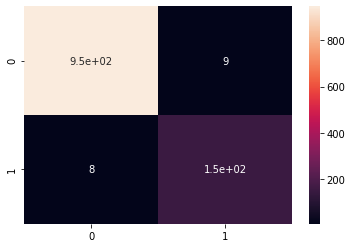

In [11]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
print('ACCURACY SCORE:',acc1)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))

In [12]:
import joblib
joblib.dump(model1,'final_model.sav')

['final_model.sav']